# Find Teleconnections (precursor regions) via correlation maps 

In [1]:
import os, inspect
main_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) # script directory
print(main_dir)
%load_ext autoreload
%autoreload 2
from RGCPD import RGCPD
from RGCPD import BivariateMI
import class_BivariateMI, functions_pp

/Users/semvijverberg/surfdrive/Scripts/RGCPD


/Users/semvijverberg/miniconda3/envs/RGCPD/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


could not import mtspec


In [2]:
# define input: list_of_name_path = [('TVname', 'TVpath'), ('prec_name', 'prec_path')]
path_test = os.path.join(main_dir, 'data')
list_of_name_path = [(3, os.path.join(path_test, 'tf5_nc5_dendo_80d77.nc')),
                    ('sst', os.path.join(path_test,'sst_daily_1979-2018_5deg_Pacific_175_240E_25_50N.nc'))]

# define analysis:
list_for_MI = [BivariateMI(name='sst', func=class_BivariateMI.corr_map, 
                          alpha=.01, FDR_control=True, 
                          distance_eps=700, min_area_in_degrees2=5)]

rg = RGCPD(list_of_name_path=list_of_name_path,
           list_for_MI=list_for_MI,
           path_outmain=os.path.join(main_dir,'data'))

sorting latitude
Plotting Corr maps xrclustered, split 0, lag 0


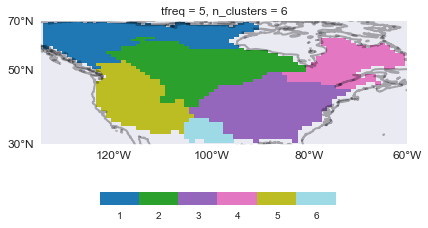

In [3]:
# if TVpath contains the xr.DataArray xrclustered, we can have a look at the spatial regions.
rg.plot_df_clust()

In [4]:
rg.pp_precursors(detrend=True, anomaly=True, selbox=None)

Loaded pre-processed data of sst



### Post-processing Target Variable

In [5]:
rg.pp_TV()

sorting latitude
original tfreq of imported response variable is converted to desired tfreq


In [6]:
rg.fulltso


<xarray.DataArray '3ts' (time: 14600)>
array([ -2.66422765,  -9.34189027, -11.16650571, ...,  -3.13444339,
         1.40941338,   4.67877285])
Coordinates:
    tfreq       int64 5
    n_clusters  int64 6
    cluster     int64 3
  * time        (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2018-12-31

In [7]:
rg.traintest?

Signature:
rg.traintest(
    method: str = None,
    seed=1,
    kwrgs_events=None,
    subfoldername=None,
)
Docstring:
Splits the training and test dates, either via cross-validation or
via a simple single split.
agrs:
'method'        : str referring to method to split train test, see
                  options for method below.
seed            : the seed to draw random samples for train test split
kwrgs_events    : dict needed to create binary event timeseries, which
                  is used to create stratified folds.
                  See func_fc.Ev_timeseries? for more info.

Options for method:
(1) random{int}   :   with the int(ex['method'][6:8]) determining the amount of folds
(2) ran_strat{int}:   random stratified folds, stratified based upon events,
                      requires kwrgs_events.
(3) leave_{int}    :   chronologically split train and test years.
(4) split{int}    :   split dataset into single train and test set
(5) no_train_test_split or False
# Extra: RV even

In [8]:
rg.traintest(method='random5')

In [9]:
rg.calc_corr_maps() 


sst - calculating correlation maps
Progress traintest set 100%, trainsize=(288dp, 80%)



Plotting Corr maps sst, split 0, lag 1


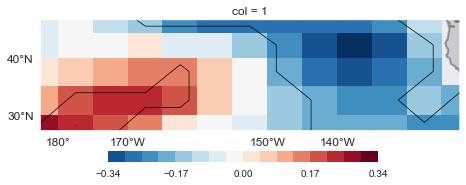

In [10]:
rg.plot_maps_corr()

In [11]:
rg.cluster_list_MI()

Plotting Corr maps sst_labels_init, split 0, lag 1
Plotting Corr maps sst_labels_init, split 1, lag 1
Plotting Corr maps sst_labels_init, split 2, lag 1
Plotting Corr maps sst_labels_init, split 3, lag 1
Plotting Corr maps sst_labels_init, split 4, lag 1


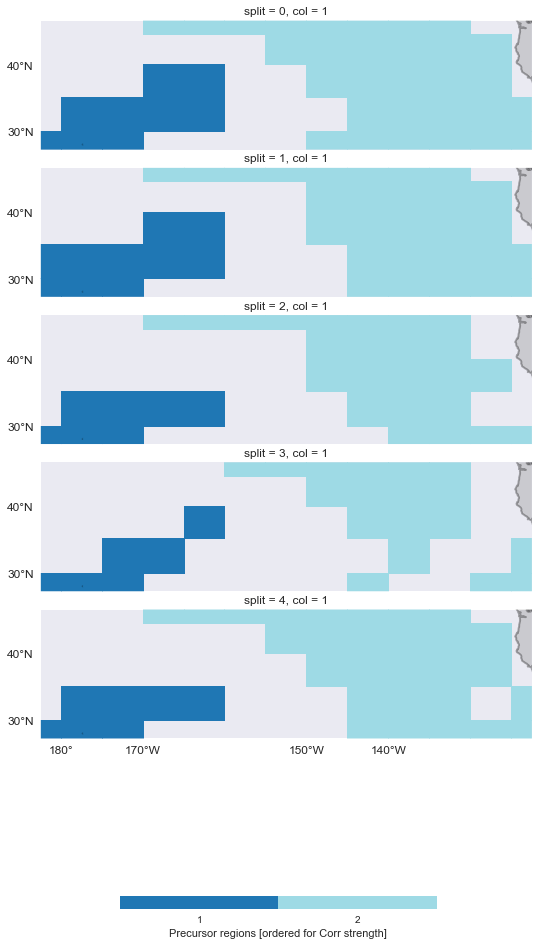

In [12]:
rg.quick_view_labels(mean=False) 

In [13]:
rg.get_ts_prec()


Getting MI timeseries
aggregating precursors to 10 days closed on right 08-31
There are [2, 2, 2, 2, 2] regions in total (list of different splits)


In [14]:
rg.df_data

3ts  1..1..sst  1..2..sst  TrainIsTrue  RV_mask
0 1979-01-19 -2.848077   0.244833   0.142718         True    False
  1979-01-29 -5.472298   0.080813   0.197305         True    False
  1979-02-08 -8.489348   0.113289   0.097720         True    False
  1979-02-18 -5.528559   0.596105   0.042683         True    False
  1979-02-28 -0.377483   0.621506   0.048709         True    False
...                ...        ...        ...          ...      ...
4 2018-11-15 -7.230792  -0.376390   0.568338         True    False
  2018-11-25 -3.207582  -0.109452   0.628773         True    False
  2018-12-05 -2.788919  -0.179714   0.524789         True    False
  2018-12-15  2.139915   0.001925   0.369524         True    False
  2018-12-25  1.974430   0.036217   0.193732         True    False

[6940 rows x 5 columns]

In [15]:
rg.PCMCI_df_data()

Progress causal inference - traintest set 100%

In [16]:
rg.PCMCI_get_links?

Signature: rg.PCMCI_get_links(var: str = None, alpha_level: float = 0.05)
Docstring:
Parameters
----------
var : str, optional
    Specify variable you want to retrieve links for. If None, returns
    links toward target variable
alpha_level : float, optional
    significance threshold. The default is .05.

Returns
-------
DataFrame of MCI coefficients and alpha values _toward_ var.
File:      ~/surfdrive/Scripts/RGCPD/RGCPD/class_RGCPD.py
Type:      method


In [17]:
rg.PCMCI_get_links(var=rg.TV.name, alpha_level=.05)
rg.df_links

0      1
0 3ts        False   True
  1..1..sst   True  False
  1..2..sst   True  False
1 3ts        False   True
  1..1..sst   True  False
  1..2..sst   True  False
2 3ts        False   True
  1..1..sst  False  False
  1..2..sst   True  False
3 3ts        False   True
  1..1..sst   True  False
  1..2..sst   True  False
4 3ts        False   True
  1..1..sst  False  False
  1..2..sst   True  False


Plotting all fields significant at alpha_level_tig, while conditioning on parents that were found in the PC step
Plotting Corr maps sst_labels, split 0, lag sst_labels
Plotting Corr maps sst_labels, split 0, lag sst_labels_tigr


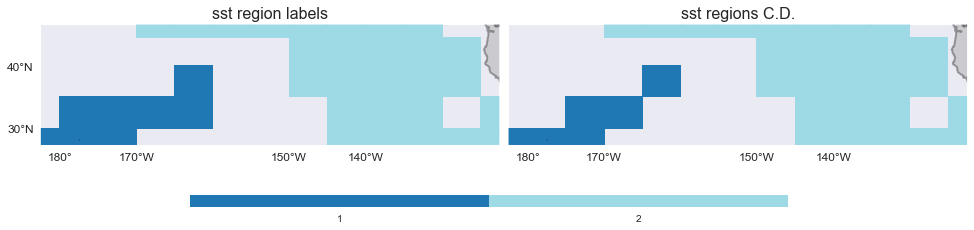

Plotting Corr maps sst_labels, split 0, lag sst_labels
Plotting Corr maps sst_labels, split 0, lag sst_labels_tigr


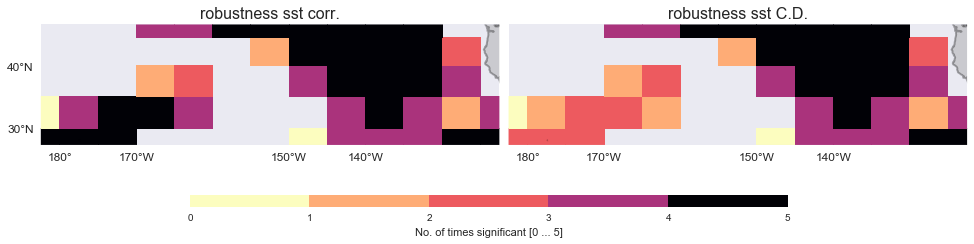


Plotting all fields significant at alpha_level_tig, while conditioning on parents that were found in the PC step
Plotting Corr maps sst_corr_and_tigr, split 0, lag sst_corr
Plotting Corr maps sst_corr_and_tigr, split 0, lag sst_corr_tigr


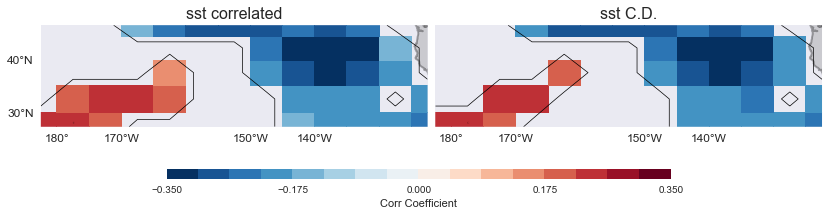

In [18]:
# on the left you see all the extraction precursor regions, on the right you see the regions which were found Conditionally Dependent (~Causal)
rg.plot_maps_sum()

In [19]:
rg.df_data

3ts  1..1..sst  1..2..sst  TrainIsTrue  RV_mask
0 1979-01-19 -2.848077   0.244833   0.142718         True    False
  1979-01-29 -5.472298   0.080813   0.197305         True    False
  1979-02-08 -8.489348   0.113289   0.097720         True    False
  1979-02-18 -5.528559   0.596105   0.042683         True    False
  1979-02-28 -0.377483   0.621506   0.048709         True    False
...                ...        ...        ...          ...      ...
4 2018-11-15 -7.230792  -0.376390   0.568338         True    False
  2018-11-25 -3.207582  -0.109452   0.628773         True    False
  2018-12-05 -2.788919  -0.179714   0.524789         True    False
  2018-12-15  2.139915   0.001925   0.369524         True    False
  2018-12-25  1.974430   0.036217   0.193732         True    False

[6940 rows x 5 columns]

In [20]:
rg.store_df_PCMCI()
path_df_data = rg.path_df_data

Data stored in 
/Users/semvijverberg/surfdrive/Scripts/RGCPD/data/3ts_80d77_06-01-08-31_sst_random5s1_/pcmci_max_combinations2max_conds_dim1max_conds_px2max_conds_py2tau_max1tau_min0pc_alpha[0.01,0.05,0.1,0.2]_dt10.h5


In [21]:
# Deprecated: rg.df_ParCorr_sum 

# Forecasting pipeline 1

In [88]:
import func_models as fc_utils
from stat_models_cont import ScikitModel
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
RFmodel = ScikitModel(RandomForestClassifier, verbosity=0)
kwrgs_model={'n_estimators':200,
            'max_depth':2,
            'scoringCV':'neg_brier_score',
            'oob_score':True,
            # 'min_samples_leaf':None,
            'random_state':0,
            'max_samples':.3,
            'n_jobs':1}

# choose type prediciton (continuous or probabilistic) by making comment #
prediction = 'continuous'   
# prediction = 'events' ; q = .66 # quantile threshold for event definition

if prediction == 'continuous':
    model = ScikitModel(Ridge, verbosity=0)
    # You can also tune parameters by passing a list of values. Then GridSearchCV from sklearn will 
    # find the set of parameters that give the best mean score on all kfold test sets. 
    # below we pass a list of alpha's to tune the regularization.
    kwrgs_model = {'scoringCV':'neg_mean_absolute_error',
                    'alpha':list(np.concatenate([[1E-20],np.logspace(-5,0, 6),
                                             np.logspace(.01, 2.5, num=25)])), # large a, strong regul.
                    'normalize':False,
                    'fit_intercept':False,
                    'kfold':5}
elif prediction == 'events':
    model = ScikitModel(LogisticRegressionCV, verbosity=0)
    kwrgs_model = {'kfold':5,
                   'scoring':'neg_brier_score'}

    

target_ts = rg.TV.RV_ts ; 
target_ts = (target_ts - target_ts.mean()) / target_ts.std()
if prediction == 'events':
    if q >= 0.5:
        target_ts = (target_ts > target_ts.quantile(q)).astype(int)
    elif q < .5:
        target_ts = (target_ts < target_ts.quantile(q)).astype(int)
    BSS = fc_utils.ErrorSkillScore(constant_bench=float(target_ts.mean())).BSS
    score_func_list = [BSS, fc_utils.metrics.roc_auc_score]
    
elif prediction == 'continuous':
    RMSE_SS = fc_utils.ErrorSkillScore(constant_bench=float(target_ts.mean())).RMSE
    MAE_SS = fc_utils.ErrorSkillScore(constant_bench=float(target_ts.mean())).MAE
    score_func_list = [RMSE_SS, fc_utils.corrcoef, MAE_SS]
        
    
out = rg.fit_df_data_ridge(target=target_ts,
                            keys=None,
                            fcmodel=model,
                            kwrgs_model=kwrgs_model,
                            transformer=False,
                            tau_min=1, tau_max=3)
predict, weights, model_lags = out

df_train_m, df_test_s_m, df_test_m, df_boot = fc_utils.get_scores(predict,
                                                                 rg.df_data.iloc[:,-2:],
                                                                 score_func_list,
                                                                 n_boot = 100,
                                                                 score_per_test=False,
                                                                 blocksize=1,
                                                                 rng_seed=1)
if prediction == 'events':
    lag = 1
    print(model.scikitmodel.__name__, '\n', f'Test score at lag {lag}\n',
          'BSS {:.2f}\n'.format(df_test_m.loc[0].loc[lag].loc['BSS']),
          'AUC {:.2f}'.format(df_test_m.loc[0].loc[lag].loc['roc_auc_score']),
          '\nTrain score\n',
          'BSS {:.2f}\n'.format(df_train_m.mean(0).loc[lag]['BSS']),
          'AUC {:.2f}'.format(df_train_m.mean(0).loc[lag]['roc_auc_score']))
elif prediction == 'continuous':
    print(model.scikitmodel.__name__, '\n', 'Test score\n',
              'RMSE {:.2f}\n'.format(df_test_m.loc[0][lag]['RMSE']),
              'MAE {:.2f}\n'.format(df_test_m.loc[0][lag]['MAE']),
              'corrcoef {:.2f}'.format(df_test_m.loc[0][lag]['corrcoef']),
              '\nTrain score\n',
              'RMSE {:.2f}\n'.format(df_train_m.mean(0).loc[lag]['RMSE']),
              'MAE {:.2f}\n'.format(df_train_m.mean(0).loc[lag]['MAE']),
              'corrcoef {:.2f}'.format(df_train_m.mean(0).loc[lag]['corrcoef']))


Ridge 
 Test score
 RMSE 0.11
 MAE 0.12
 corrcoef 0.45 
Train score
 RMSE 0.13
 MAE 0.14
 corrcoef 0.48


# Forecasting pipeline 2 
Used for paper https://doi.org/10.1175/MWR-D-19-0409.1

There is some multiprocessing based on Python's standard 'concurrent futures' module. This only works when run script is run in one go. Will not work another time. Has to do with the running the code as the __main__ file or something.. (don't know the details). 

Now we load in the data, including info on the causal links. 

In [22]:
from class_fc import fcev
import valid_plots as dfplots

In [89]:
fc = fcev(path_data=path_df_data, n_cpu=1, causal=True)
fc.df_data

keys is None: Using all keys in training sets


3ts  1..1..sst  1..2..sst  TrainIsTrue  RV_mask
0 1979-01-19 -2.848077   0.244833   0.142718         True    False
  1979-01-29 -5.472298   0.080813   0.197305         True    False
  1979-02-08 -8.489348   0.113289   0.097720         True    False
  1979-02-18 -5.528559   0.596105   0.042683         True    False
  1979-02-28 -0.377483   0.621506   0.048709         True    False
...                ...        ...        ...          ...      ...
4 2018-11-15 -7.230792  -0.376390   0.568338         True    False
  2018-11-25 -3.207582  -0.109452   0.628773         True    False
  2018-12-05 -2.788919  -0.179714   0.524789         True    False
  2018-12-15  2.139915   0.001925   0.369524         True    False
  2018-12-25  1.974430   0.036217   0.193732         True    False

[6940 rows x 5 columns]

In [90]:
fc.get_TV(kwrgs_events=None)

Define statmodel:

In [91]:
fc.fit_models?


Signature: fc.fit_models(lead_max=array([1]), verbosity=None)
Docstring:
stat_model_l:   list of with model string and kwrgs
keys_d      :   dict, with keys : list of variables to fit, if None
                all keys in each training set will be used to fit.
                If string is given, exp_py will follow some rules to
                keep only keys you want to fit.
precur_aggr:  int: convert daily data to aggregated {int} day mean
File:      ~/surfdrive/Scripts/RGCPD/forecasting/class_fc.py
Type:      method


In [ ]:
fc.fit_models(lead_max=35)

tfreq: 10, max lag: 4, i.e. 35 days
('logit', None)


In [ ]:
dict_experiments = {}       
fc.perform_validation(n_boot=100, blocksize='auto', 
                              threshold_pred=(1.5, 'times_clim'))
dict_experiments['test'] = fc.dict_sum

In [28]:
working_folder, filename = fc._print_sett(list_of_fc=[fc])
store=True
dict_all = dfplots.merge_valid_info([fc], store=store)
if store:
    dict_merge_all = functions_pp.load_hdf5(filename)


Event settings:


***Experiment 1***


Title 	 : exper_1
file 	 : /Users/semvijverberg/surfdrive/Scripts/RGCPD/data/3ts_80d77_06-01-08-31_sst_random5s1_/pcmci_max_combinations2max_conds_dim1max_conds_px2max_conds_py2tau_max1tau_min0pc_alpha[0.01,0.05,0.1,0.2]_dt10.h5
kwrgs_events 	 : {'event_percentile': 66, 'min_dur': 1, 'max_break': 0, 'grouped': False, 'window': 'mean'}
kwrgs_pp 	 : {}
TV dates: 	 ('6-8', '8-27')
tfreq: 	 10
precur_aggr: 	 None
TV_aggr: 	 None
alpha 	 : 0.05
nboot: 100
stat_models:
('logit', None)
fold: None
fc threshold: (1.5, 'times_clim')


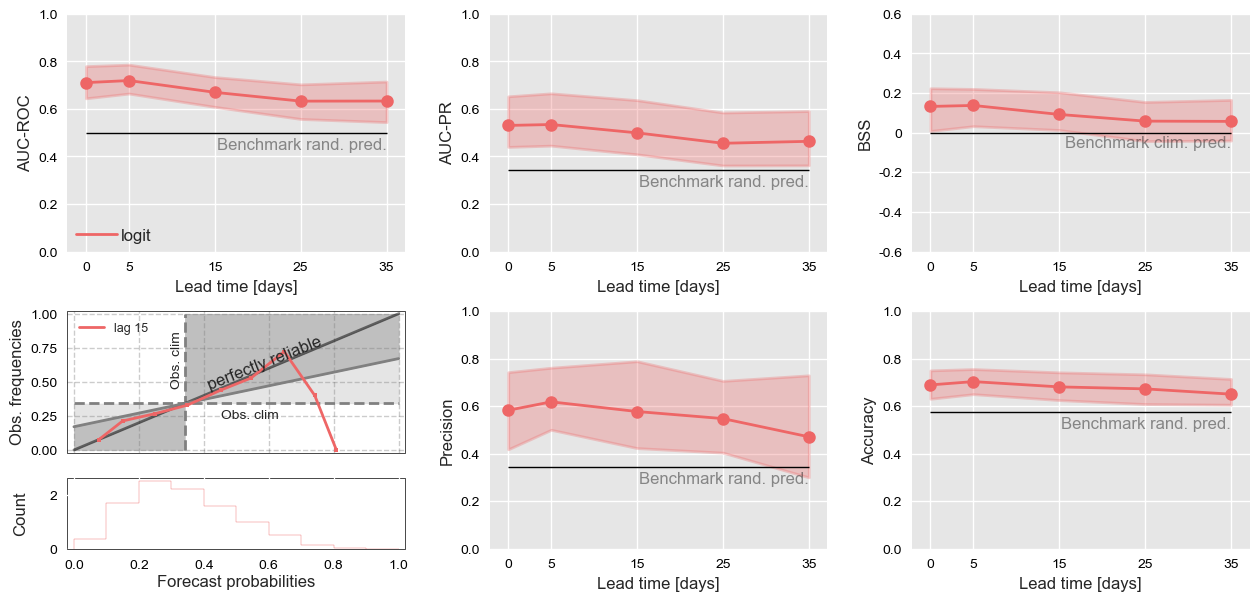

In [29]:

kwrgs = {'wspace':0.25, 'col_wrap':3} #, 'threshold_bin':fc.threshold_pred}
met = ['AUC-ROC', 'AUC-PR', 'BSS', 'Rel. Curve', 'Precision', 'Accuracy']
expers = list(dict_experiments.keys())
line_dim = 'model'


fig = dfplots.valid_figures(dict_merge_all, #expers=expers, #models=models,
                          line_dim=line_dim, 
                          group_line_by=None,  
                          met=met, **kwrgs)